###### Content provided under a Creative Commons Attribution license, CC-BY 4.0; code under BSD 3-Clause license. (c)2014 Lorena A. Barba, Olivier Mesnard. Thanks: NSF for support via CAREER award #1149784.

# Doublet

Welcome to the third lesson of *AeroPython*! We created some very interesting potential flows in lessons 1 and 2, with our [Source & Sink](01_Lesson01_sourceSink.ipynb) notebook, and our [Source & Sink in a Freestream](02_Lesson02_sourceSinkFreestream.ipynb) notebook.

Think about the Source & Sink again, and now imagine that you are looking at this flow pattern from very far away. The streamlines that are between the source and the sink will be very short, from this vantage point. And the other streamlines will start looking like two groups of circles, tangent at the origin. If you look from far enough away, the distance between source and sink approaches zero, and the pattern you see is called a *doublet*.

Let's see what this looks like. First, load our favorite libraries.

In [5]:
import math
import numpy
from matplotlib import pyplot
# embed figures into the notebook
%matplotlib inline

In the previous notebook, we saw that a source-sink pair in a uniform flow can be used  to represent the streamlines around a particular shape, named a Rankine oval. In this notebook, we will turn that source-sink pair into a doublet.

First, consider a source of strength $\sigma$ at $\left(-\frac{l}{2},0\right)$ and a sink of opposite strength located at $\left(\frac{l}{2},0\right)$. Here is a sketch to help you visualize the situation:

<center><img src="resources/doubletSketch1.png"><center>

The stream-function associated to the source-sink pair, evaluated at point $\text{P}\left(x,y\right)$, is

$$\psi\left(x,y\right) = \frac{\sigma}{2\pi}\left(\theta_1-\theta_2\right) = -\frac{\sigma}{2\pi}\Delta\theta$$

Let the distance $l$ between the two singularities approach zero while the strength magnitude is increasing so that the product $\sigma l$ remains constant. In the limit, this flow pattern is a *doublet* and we define its strength by $\kappa = \sigma l$.

The stream-function of a doublet, evaluated at point $\text{P}\left(x,y\right)$, is given by

$$\psi\left(x,y\right) = \lim \limits_{l \to 0} \left(-\frac{\sigma}{2\pi}d\theta\right) \quad \text{and} \quad \sigma l = \text{constant}$$

<center><img src="resources/doubletSketch2.png"></center>

Considering the case where $d\theta$ is infinitesimal, we deduce from the figure above that

$$a = l\sin\theta$$

$$b = r-l\cos\theta$$

$$d\theta = \frac{a}{b} = \frac{l\sin\theta}{r-l\cos\theta}$$

so the stream function becomes

$$\psi\left(r,\theta\right) = \lim \limits_{l \to 0} \left(-\frac{\sigma l}{2\pi}\frac{\sin\theta}{r-l\cos\theta}\right) \quad \text{and} \quad \sigma l = \text{constant}$$

i.e.

$$\psi\left(r,\theta\right) = -\frac{\kappa}{2\pi}\frac{\sin\theta}{r}$$

In Cartesian coordinates, a doublet located at the origin has the stream function

$$\psi\left(x,y\right) = -\frac{\kappa}{2\pi}\frac{y}{x^2+y^2}$$

from which we can derive the velocity components

$$u\left(x,y\right) = \frac{\partial\psi}{\partial y} = -\frac{\kappa}{2\pi}\frac{x^2-y^2}{\left(x^2+y^2\right)^2}$$

$$v\left(x,y\right) = -\frac{\partial\psi}{\partial x} = -\frac{\kappa}{2\pi}\frac{2xy}{\left(x^2+y^2\right)^2}$$

Now we have done the math, it is time to code and visualize what the streamlines look like. We start by creating a mesh grid.

In [9]:
N = 50                                # Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -1.0, 1.0            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # creates a 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # creates a 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid

We consider a doublet of strength $\kappa=1.0$ located at the origin.

In [15]:
kappa = 1.0                        # strength of the doublet
x_doublet, y_doublet = 0.0, 1.0    # location of the doublet
x_doublet1, y_doublet1 = 0.0, 1.0    # location of the doublet
x_doublet2, y_doubbet2 = 0.0, -1.0    # location of the doublet

As seen in the previous notebook, we play smart by defining functions to calculate the stream function and the velocity components that could be re-used if we decide to insert more than one doublet in our domain.

In [11]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    """
    Returns the velocity field generated by a doublet.

    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.

    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = (- strength / (2 * math.pi) *
         ((X - xd)**2 - (Y - yd)**2) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    v = (- strength / (2 * math.pi) *
         2 * (X - xd) * (Y - yd) /
         ((X - xd)**2 + (Y - yd)**2)**2)

    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
    """
    Returns the stream-function generated by a doublet.

    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.

    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = - strength / (2 * math.pi) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)

    return psi

Once the functions have been defined, we call them using the parameters of the doublet: its strength `kappa` and its location `x_doublet`, `y_doublet`.

In [18]:
# compute the velocity field on the mesh grid
u_doublet1, v_doublet1 = get_velocity_doublet(kappa, x_doublet1, y_doublet1, X, Y)
u_doublet2, v_doublet2 = get_velocity_doublet(kappa, x_doublet2, y_doublet2, X, Y)

# compute the stream-function on the mesh grid
psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet, X, Y)

We are ready to do a nice visualization.

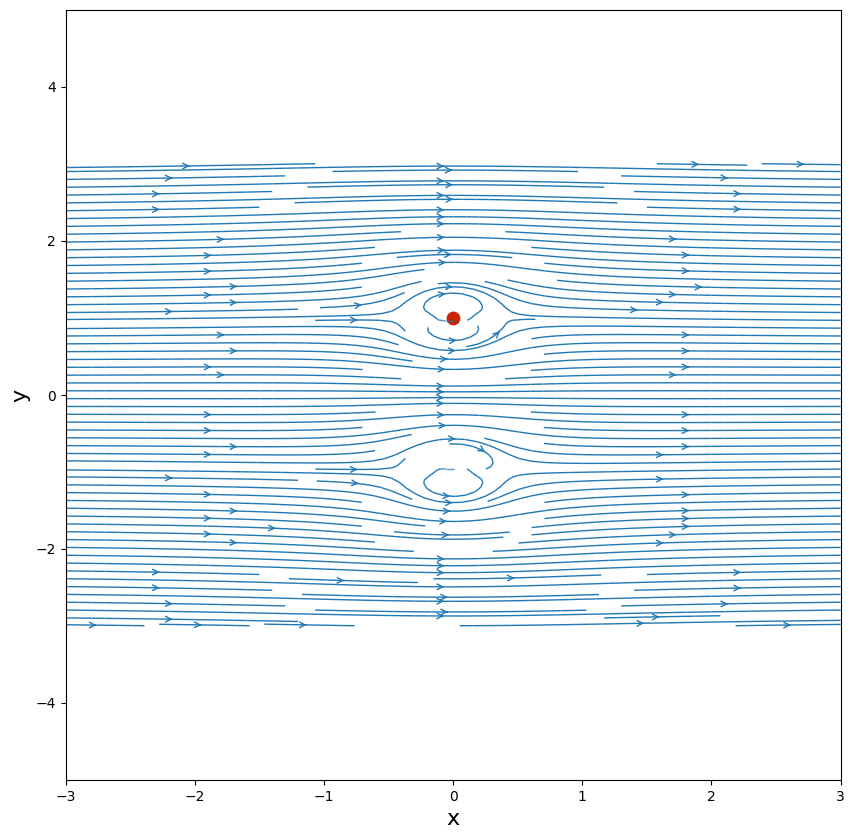

In [ ]:
# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_doublet, v_doublet,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o');

Just like we imagined that the streamlines of a source-sink pair would look from very far away. What is this good for, you might ask? It does not look like any streamline pattern that has a practical use in aerodynamics. If that is what you think, you would be wrong!

## Uniform flow past a doublet

A doublet alone does not give so much information about how it can be used to represent a practical flow pattern in aerodynamics. But let's use our superposition powers: our doublet in a uniform flow turns out to be a very interesting flow pattern. Let's first define a uniform horizontal flow.

In [ ]:
u_inf = 1.0        # freestream speed

Remember from our previous lessons that the Cartesian velocity components of a uniform flow in the $x$-direction are given by $u=U_\infty$ and $v=0$. Integrating, we find the stream-function, $\psi = U_\infty y$.

So let's calculate velocities and stream function values for all points in our grid. And as we now know, we can calculate them all together with one line of code per array.

In [ ]:
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

psi_freestream = u_inf * Y

Below, the stream function of the flow created by superposition of a doublet in a free stream is obtained by simple addition. Like we did before in the [Source & Sink in a Freestream](02_Lesson02_sourceSinkFreestream.ipynb) notebook, we find the *dividing streamline* and plot it separately in red.

The plot shows that this pattern can represent the flow around a cylinder with center at the location of the doublet. All the streamlines remaining outside the cylinder originated from the uniform flow. All the streamlines inside the cylinder can be ignored and this area assumed to be a solid object. This will turn out to be more useful than you may think.

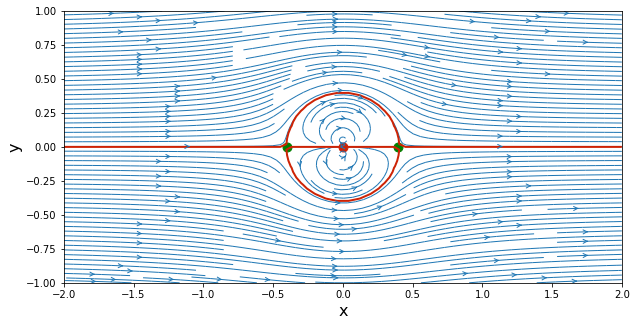

In [ ]:
# superposition of the doublet on the freestream flow
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

# calculate the stagnation points
x_stagn1, y_stagn1 = +math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0
x_stagn2, y_stagn2 = -math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0

# display the stagnation points
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color='g', s=80, marker='o');

##### Challenge question

What is the radius of the circular cylinder created when a doublet of strength $\kappa$ is added to a uniform flow $U_\infty$ in the $x$-direction?

##### Challenge task

You have the streamfunction of the doublet in cylindrical coordinates above. Add the streamfunction of the free stream in those coordinates, and study it. You will see that $\psi=0$ at $r=a$ for all values of $\theta$. The line $\psi=0$ represents the circular cylinder of radius $a$. Now write the velocity components in cylindrical coordinates, find the speed of the flow at the surface. What does this tell you?

### Bernoulli's equation and the pressure coefficient

A very useful measurement of a flow around a body is the *coefficient of pressure* $C_p$. To evaluate the pressure coefficient, we apply *Bernoulli's equation* for ideal flow, which says that along a streamline we can apply the following between two points:

$$p_\infty + \frac{1}{2}\rho U_\infty^2 = p + \frac{1}{2}\rho U^2$$

We define the pressure coefficient as the ratio between the pressure difference with the free stream, and the dynamic pressure:

$$C_p = \frac{p-p_\infty}{\frac{1}{2}\rho U_\infty^2}$$

i.e.,

$$C_p = 1 - \left(\frac{U}{U_\infty}\right)^2$$

In an incompressible flow, $C_p=1$ at a stagnation point. Let's plot the pressure coefficient in the whole domain.

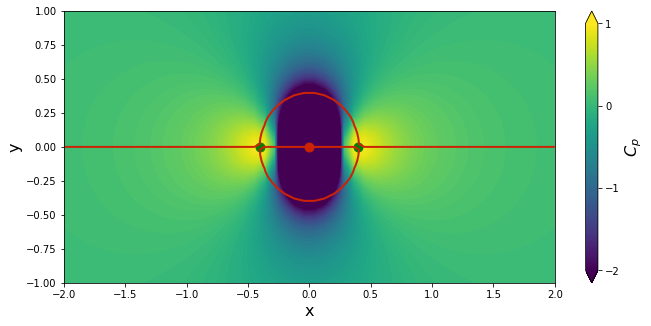

In [ ]:
# compute the pressure coefficient field
cp = 1.0 - (u**2 + v**2) / u_inf**2

# plot the pressure coefficient field
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp,
                        levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter(x_doublet, y_doublet,
               color='#CD2305', s=80, marker='o')
pyplot.contour(X,Y,psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color='g', s=80, marker='o');

##### Challenge task

Show that the pressure coefficient distribution on the surface of the circular cylinder is given by

$$C_p = 1-4\sin^2\theta$$

and plot the coefficient of pressure versus the angle.

##### Think

Don't you find it a bit fishy that the pressure coefficient (and the surface distribution of pressure) is symmetric about the vertical axis?

That means that the pressure in the front of the cylinder is the same as the pressure in the *back* of the cylinder. In turn, this means that the horizontal components of forces are zero.

We know that, even at very low Reynolds number (creeping flow), there *is* in fact a drag force. The theory is unable to reflect that experimentally observed fact! This discrepancy is known as *d'Alembert's paradox*.

Here's how creeping flow around a cylinder *really* looks like:

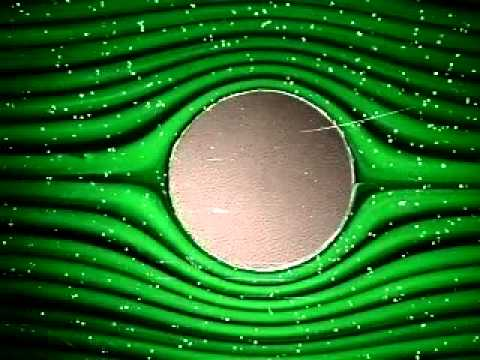

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('Ekd8czwELOc')

If you look carefully, there is a slight asymmetry in the flow pattern. Can you explain it? What is the consequence of that?

Here's a famous visualization of actual flow around a cylinder at a Reynolds number of 1.54. This image was obtained by S. Taneda and it appears in the "Album of Fluid Motion", by Milton Van Dyke. A treasure of a book.

<center><img src="resources/Cylinder-Re=1dot54.png"></center>

---

In [ ]:
from IPython.core.display import HTML
def css_styling(filepath):
    styles = open(filepath, 'r').read()
    return HTML(styles)
css_styling('../styles/custom.css')